https://github.com/rickiepark/hg-mldl/blob/master/7-1.ipynb

In [4]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()


In [6]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [41]:
train_input[4000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61,
        151, 164, 161, 101,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0, 150, 241,
         96,  21,  48, 200, 206,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0, 132, 213,   0,
          0,   0,   0,   0, 169, 151,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,  54, 191,   0,   0,
          3,   0,   2,   0,   0, 172,  90,   0,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0, 169, 111,   0,   0,
          0,   0,   0,   2,   0,  82, 181,   0,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,  86, 202,  73,   0,   0,
          0,   0,   0,   0,   0,   0, 176,  88,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [48]:
train_input[4000,4]

array([  0,   0,   0,   0,   0,   0,   1,   0,   0, 169, 111,   0,   0,
         0,   0,   0,   2,   0,  82, 181,   0,   0,   2,   0,   0,   0,
         0,   0], dtype=uint8)

In [8]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


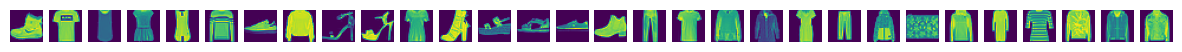

In [47]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 30, figsize=(15,15))

for i in range(30):
    axs[i].imshow(train_input[i])
    axs[i].axis('off')
plt.show()

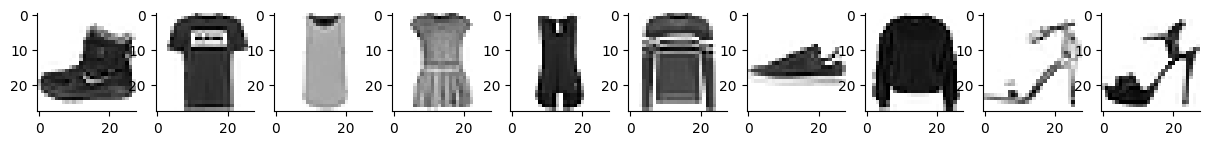

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(15,15))

# train_input[i] => 28 * 28 

for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    # axs[i].axis('off')
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
plt.show()

In [16]:

print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [17]:
import numpy as np
# 테스트용이엉서 데이터가 깔끔한 상
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


# 로지스틱 회귀로 패션 아이템 분류하기

In [52]:
train_scaled = train_input / 255.0
# print(train_scaled[0])
train_scaled = train_scaled.reshape(-1, 28*28)

In [53]:
# (60000, 28, 28) 에서 (60000, 784) 변경 
print(train_scaled.shape)

(60000, 784)


In [60]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 반복횟수 (max_iter)
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


In [59]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 반복횟수 (max_iter)
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8313833333333334


# 인공신경망으로 모델 만들기

In [61]:

import tensorflow as tf

from tensorflow import keras

In [62]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [63]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [64]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [65]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [66]:

model = keras.Sequential(dense)

# 인공신경망으로 패션 아이템 분류하기

In [67]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [68]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [69]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 697us/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 1s 705us/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 1s 706us/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 1s 707us/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 1s 721us/step - loss: 0.4280 - accuracy: 0.8555


In [70]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 659us/step - loss: 0.4526 - accuracy: 0.8465


[0.45262548327445984, 0.8464999794960022]